In [1]:
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1347269321148542976,Elon Musk is now the richest person in the wor...,AllotteTV,AllotteTV,2021-01-07T19:50:11.000Z,Thu Jan 07 19:50:11 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,https://www.allottetv.com/2021/01/elon-musk-is...,0,0,NaN,NaN,NaN,NaN,NaN
1,1347269320380968962,"RT @business : Elon Musk, the outspoken entrep...",Oops. I. Won.,oopsiwon,2021-01-07T19:50:11.000Z,Thu Jan 07 19:50:11 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,https://trib.al/s0b1ERB,0,0,NaN,NaN,NaN,NaN,NaN
2,1347269317998628864,Elon Musk becoming the richest person on the p...,vampire who can only use websites with dark mode,justine_hudock,2021-01-07T19:50:11.000Z,Thu Jan 07 19:50:11 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Tweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
3,1347269317486907394,"RT @Forbes : No, Elon Musk is not the richest ...",Jordë-Xxes..,JAYTHEGOD,2021-01-07T19:50:10.000Z,Thu Jan 07 19:50:10 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,http://on.forbes.com/6017HVAzX,0,1,photo,https://pbs.twimg.com/media/ErJ00HUWMAEFOZm.jpg,NaN,NaN,NaN
4,1347269315595280389,RT @lexfridman : Elon Musk is now the richest ...,Made In Lagos. ✊🏾,5ths_,2021-01-07T19:50:10.000Z,Thu Jan 07 19:50:10 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,1347262932858540032,RT @disclosetv : JUST IN - Elon Musk just pass...,President-Elect Tividar,SaintTividar,2021-01-07T19:24:48.000Z,Thu Jan 07 19:24:48 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Retweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2076,1347262928941056001,Elon Musk Reacts to News that He's the Richest...,lucilleroger@bazanac,lucillerogerba1,2021-01-07T19:24:47.000Z,Thu Jan 07 19:24:47 +0000 2021,1,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,https://www.outkick.com/elon-musk-reacts-to-ne...,0,0,NaN,NaN,NaN,NaN,NaN
2077,1347262925480751105,RT @HotFreestyle : Elon Musk is now the riches...,Bruce,BruceAlsina,2021-01-07T19:24:47.000Z,Thu Jan 07 19:24:47 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,photo,https://pbs.twimg.com/media/ErJLTxpW4AA_Yt0.jpg,NaN,NaN,NaN
2078,1347262924071571459,RT @npuk1 : 700 years after Mansa Musa of Mali...,Rotus,Rotankwot,2021-01-07T19:24:46.000Z,Thu Jan 07 19:24:46 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,photo,https://pbs.twimg.com/media/ErJi58YVgAAv4ea.jpg,NaN,NaN,NaN


In [5]:
df1 = df["Text"] , df["Tweet Type"]

In [6]:
df.columns

Index(['Tweet Id', 'Text', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client', 'Tweet Type', 'URLs',
       'Hashtags', 'Mentions', 'Media Type', 'Media URLs', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [8]:
df1 = pd.DataFrame(df1).T

In [9]:
df1.head()

,Text,Tweet Type
0,Elon Musk is now the richest person in the wor...,Tweet
1,"RT @business : Elon Musk, the outspoken entrep...",Retweet
2,Elon Musk becoming the richest person on the p...,Tweet
3,"RT @Forbes : No, Elon Musk is not the richest ...",Retweet
4,RT @lexfridman : Elon Musk is now the richest ...,Retweet


In [17]:
# Clean the text 

# Create a function to clean the tweets

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # Removed @
    text = re.sub(r'#', '', text) #Removed #tags
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\s', '', text) #removing hyperlinks
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'_', '', text) #remoed _
    text = re.sub(r'https', '', text)
    text = re.sub(r't', '', text)
    text = re.sub(r'co', '', text)
    return text

In [18]:
df["Text"] = df["Text"].apply(cleanTxt)

In [19]:
data = pd.DataFrame(df["Text"])
data

,Text
0,Elon Musk is now he riches person in he world ...
1,Elon Musk he ouspoken enrepreneur behind Te...
2,Elon Musk beming he riches person on he plane ...
3,No Elon Musk is no he riches person in he w...
4,Elon Musk is now he riches person in he worl...
...,...
2075,JUST IN Elon Musk jus passed Jeff Bezos as...
2076,Elon Musk Reacs o News ha He s he Riches Perso...
2077,Elon Musk is now he riches person in he worl...
2078,700 years afer Mansa Musa of Mali reigned f...


In [20]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 


#Create two new column 

data["Subjectivity"] = data["Text"].apply(getSubjectivity)
data["Polarity"] = data["Text"].apply(getPolarity)

data.head(15)
    

,Text,Subjectivity,Polarity
0,Elon Musk is now he riches person in he world ...,0.0,0.00
1,Elon Musk he ouspoken enrepreneur behind Te...,0.7,-0.40
2,Elon Musk beming he riches person on he plane ...,0.0,0.00
3,No Elon Musk is no he riches person in he w...,0.0,0.00
4,Elon Musk is now he riches person in he worl...,0.6,0.50
5,TESLA CEO ELON MUSK IS NOW THE RICHEST PERS...,0.0,0.00
6,yPVy7xAVQL CONGRATS MR ELON,0.0,0.00
7,squirrel elon musk has jus beme he riches pe...,0.0,0.00
8,BREAKING Elon Musk has beme he world s rich...,0.0,0.00
9,Elon Musk has edged pas Amazon founder Jeff ...,0.0,0.00


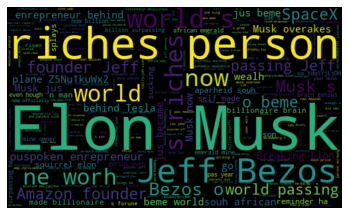

In [21]:
# plot Wordcloud / TextCloud

allwords = ' '.join([twts for twts in data["Text"]])
wordCloud = WordCloud(width= 500, height=300, random_state=21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# Create a function to compute the Sentiment

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["Analysis"] = data["Polarity"].apply(analysis)
data.head()

,Text,Subjectivity,Polarity,Analysis
0,Elon Musk is now he riches person in he world ...,0.0,0.0,Neutral
1,Elon Musk he ouspoken enrepreneur behind Te...,0.7,-0.4,Negative
2,Elon Musk beming he riches person on he plane ...,0.0,0.0,Neutral
3,No Elon Musk is no he riches person in he w...,0.0,0.0,Neutral
4,Elon Musk is now he riches person in he worl...,0.6,0.5,Positive


In [24]:
#Print all positive

x=1
sortedDf = data.sort_values(by=["Polarity"])

for i in range(0, sortedDf.shape[0]): #for number of rows in dataframe
    if sortedDf['Analysis'][i] == 'Positive':
        print(str(x) + ')' +sortedDf["Text"][i])
        print()
        x = x + 1
        
    

1)  Elon Musk is now he riches person in he world   Sep 1  Build hings ha people love  Sep 2  Profi 

2)  Souh Africa s very own Elon Musk is now he riches person in he world  The Preoria raised enrepreneur has overaken Amazon boss Jeff Bezos  eNCA      5a7YvCPaMD

3)  No bad for a lile boykie from Fourways Souh Africa  Elon Musk is now he riches person on he plane  surpassing Jeff Bezos wih a ne worh of  188 5 billion      Ja51WOWBT via 

4)Elon Musk Surpasses Amazon s Bezos as he World s Riches Person  Bloomberg repors ha he Tesla presiden s ne worh grew o more han   188 5 billion  abou  1 5 billion more han Bezos        rJUwEczC8b      aYFyXQYWE

5)  Elon Musk now officially he riches person in he world  passing Jeff Bezos   More       FXfefHUGqY      QhqxjoCda6

6)  Elon Musk is now he riches person in he world   Sep 1  Build hings ha people love  Sep 2  Profi 

7)people geing happy ha elon musk is he riches person in he world like he will be sharing i wih hem

8)  Elon Musk  now h

In [25]:
#Print all positive

x=1
sortedDf = data.sort_values(by=["Polarity"])

for i in range(0, sortedDf.shape[0]): #for number of rows in dataframe
    if sortedDf['Analysis'][i] == 'Negative':
        print(str(x) + ')' +sortedDf["Text"][i])
        print()
        x = x + 1

1)  Elon Musk  he ouspoken enrepreneur behind Tesla and SpaceX  is now he riches person on he plane      Z5Nu1kuWx2

2)CNN is a lonial pro Zionis media  Therefore  i is always biased  pro Democraic   praises he snouy  nose imperialis billionaires  suppors he illigiimae murderous Zionis regime of Israel amp ani poor media       Y3kJLaQhZr

3)  Elon Musk  he ouspoken enrepreneur behind Tesla and SpaceX  is now he riches person on he plane      Z5Nu1kuWx2

4)  Elon Musk  he ouspoken enrepreneur behind Tesla and SpaceX  is now he riches person on he plane      Z5Nu1kuWx2

5)  This is ruly absurd   The rich ge richer and he poor ge poorer        on8wOXiwu5

6)  Elon Musk  he ouspoken enrepreneur behind Tesla and SpaceX  is now he riches person on he plane      Z5Nu1kuWx2

7)  Elon Musk  he ouspoken enrepreneur behind Tesla and SpaceX  is now he riches person on he plane      Z5Nu1kuWx2

8)  Elon Musk  he ouspoken enrepreneur behind Tesla and SpaceX  is now he riches person on he plane      

In [28]:
#Print all neutrals

x=1
sortedDf = data.sort_values(by=["Polarity"])

for i in range(0, sortedDf.shape[0]): #for number of rows in dataframe
    if sortedDf['Analysis'][i] == 'Neutral':
        print(str(x) + ')' +sortedDf["Tweet Content"][i])
        print()
        x = x + 1

1)   What a difference 4 years can make   Trump Republican NewYearsEve 2021 cartoon Satire https   t co UlnF0g3  

2)   Here we go  yo  here we go  yo  NewYearsEve     https   t co BAi0YQk0fi 

3)   The Tree of Life  the Apple Tree  associated with rebirth and Christmas and connected to Celtic celebrations  Wassailing  

4) It was NewYearsEve when Kiro Khalil lost the closest family members in an attack  They were arriving at the Church of St  Mark and St  Peter in Alexandria when a car bomb exploded across the church  Twenty four people died  and hundreds were injured   https   t co 05CitHkbTd https   t co 2IxQFrjvyQ 

5)   If you want to buy or sell a car we are here to help you McCarthy group WhatsApp 0814947452 No deposit is required  Please  

6)   2020 beeroftheyear          ManvsAle MvA HappyNewYear NewYearsEve whatayear beeroclock beertwitter https   t co BpqHc  

7)   Delhi imposes two night curfew on NewYearsEve   no celebrations allowed at public places   https   t co 0SIUIK

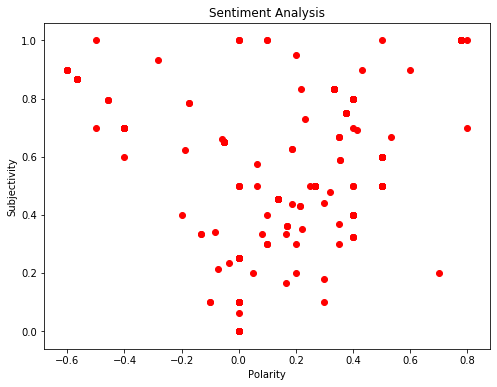

In [26]:
# Plot the polarity and the Subjectivity 

plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
    plt.scatter(data["Polarity"][i], data["Subjectivity"][i], color="red")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [27]:
#Get the Percentage of positive tweets

ptweets = data[data.Analysis == "Positive"]
ptweets = ptweets["Text"]


print(round((ptweets.shape[0] / data.shape[0]) *100, 1),"\n")

print("All the postive comments are here -\n ")
print(ptweets)

26.2 

All the postive comments are here -
 
4         Elon Musk is now he riches person in he worl...
10        Souh Africa s very own Elon Musk is now he r...
18        No bad for a lile boykie from Fourways Souh ...
21      Elon Musk Surpasses Amazon s Bezos as he World...
25        Elon Musk now officially he riches person in...
                              ...                        
2057      Elon Musk now officially he riches person in...
2065      Elon Musk  now he riches person in he world ...
2066      Elon Musk now officially he riches person in...
2067      Elon Musk now officially he riches person in...
2068      Souh Africa s very own Elon Musk is now he r...
Name: Text, Length: 544, dtype: object


In [28]:
#Get the Percentage of positive tweets

ntweets = data[data.Analysis == "Negative"]
ntweets = ntweets["Text"]


print(round((ntweets.shape[0] / data.shape[0]) *100, 1),"%\n")

print("All the negative comments are here -\n ")
print(ntweets)

13.8 %

All the negative comments are here -
 
1         Elon Musk  he ouspoken enrepreneur behind Te...
28      CNN is a lonial pro Zionis media  Therefore  i...
37        Elon Musk  he ouspoken enrepreneur behind Te...
54        Elon Musk  he ouspoken enrepreneur behind Te...
65        This is ruly absurd   The rich ge richer and...
                              ...                        
2059      Elon Musk  he ouspoken enrepreneur behind Te...
2062    Elon Musk passes Jeff Bezos as riches person b...
2063      Elon Musk leaves behind Amazon s Bezos o bem...
2069    Elon Musk passes Jeff Bezos as riches person b...
2071      Elon Musk  he ouspoken enrepreneur behind Te...
Name: Text, Length: 288, dtype: object


In [29]:
#Get the Percentage of positive tweets

neutweets = data[data.Analysis == "Neutral"]
neutweets = neutweets["Text"]


print(round((neutweets.shape[0] / data.shape[0]) *100, 1),"%\n")

print("All the neutral comments are here -\n ")
print(neutweets)

60.0 %

All the neutral comments are here -
 
0       Elon Musk is now he riches person in he world ...
2       Elon Musk beming he riches person on he plane ...
3         No  Elon Musk is no he riches person in he w...
5          TESLA CEO ELON MUSK IS NOW THE RICHEST PERS...
6                          yPVy7xAVQL CONGRATS   MR  ELON
                              ...                        
2075      JUST IN   Elon Musk jus passed Jeff Bezos as...
2076    Elon Musk Reacs o News ha He s he Riches Perso...
2077      Elon Musk is now he riches person in he worl...
2078      700 years afer Mansa Musa of Mali  reigned f...
2079      Elon Musk is now he riches person in he worl...
Name: Text, Length: 1248, dtype: object


In [30]:
#Show the value content

data["Analysis"].value_counts()

Neutral     1248
Positive     544
Negative     288
Name: Analysis, dtype: int64

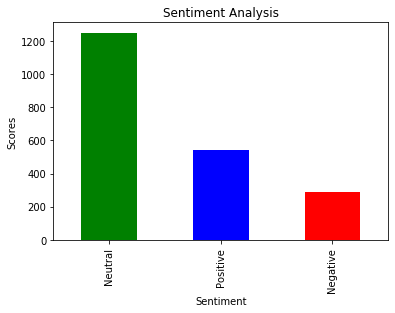

In [31]:
#Plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
data["Analysis"].value_counts().plot(kind="bar", color=['green', 'blue', 'red'])
plt.show()

In [82]:
# Save the final dataset
data.to_csv (r'C:\Users\Atif\Desktop\URGENTS\MBIA\Courses\Unstructured Data - Raini\dataset.csv', index = False, header=True)
